
Project 3: Linear Regression Model Development and Evaluation
Project Title: Predictive Modeling: Linear Regression for Continuous Target Variable
Project Goal: To develop, train, and rigorously evaluate a Linear Regression model for predicting a continuous target variable, utilizing a benchmark regression dataset. This project aims to demonstrate proficiency in model training, hyperparameter tuning (implicitly, by using a standard model), performance metric calculation, and result visualization.

In [ ]:
#STEP 1
#Dataset Acquisition and Preparation:
#import pandas library
import pandas as pd
#load dataset
df=pd.read_csv("/content/HousingData.csv")
#initial inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (506, 14)

First 5 rows:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Data Types:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Missing Values:
 CRIM       20
ZN

In [ ]:
#STEP 2
#Data Splitting for Model Validation:
#Split the prepared dataset into Training and Testing sets (80/20)
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop("MEDV", axis=1)  # All columns except MEDV
y = df["MEDV"]               # Target column

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Display the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (404, 13)
Testing Features Shape: (102, 13)
Training Target Shape: (404,)
Testing Target Shape: (102,)


In [ ]:
#STEP 3
#Linear Regression Model Training and Evaluation:
#Model Training
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize an imputer to fill missing values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Train (fit) the model using the imputed training data
model.fit(X_train_imputed, y_train)

print("Model training completed.")

Model training completed.


In [ ]:
#  Prediction Generation

# Use the trained model to make predictions on the imputed test data
y_pred = model.predict(X_test_imputed)

print("Predictions on the held-out test dataset:")
print(y_pred)


Predictions on the held-out test dataset:
[ 2.90433606e+01  3.65125694e+01  1.45303722e+01  2.50478175e+01
  1.83800150e+01  2.30200482e+01  1.79528446e+01  1.45661715e+01
  2.20693335e+01  2.08472334e+01  2.51094814e+01  1.85533460e+01
 -5.65896747e+00  2.17182188e+01  1.90650018e+01  2.60968051e+01
  1.96653601e+01  5.81257146e+00  4.08912145e+01  1.71697249e+01
  2.55602832e+01  3.02209429e+01  1.17834608e+01  2.36969955e+01
  1.73105229e+01  1.50752804e+01  2.18343032e+01  1.45020073e+01
  2.28051304e+01  1.94170855e+01  2.25488611e+01  2.52191733e+01
  2.55217459e+01  1.66412152e+01  1.63776909e+01  1.67007312e+01
  3.11176898e+01  2.02617301e+01  2.43685627e+01  2.33237654e+01
  1.44801453e+01  3.22961792e+01  4.29116713e+01  1.76245704e+01
  2.76203849e+01  1.63808980e+01  1.42541100e+01  2.61080447e+01
  1.96930035e+01  3.01708736e+01  2.10137566e+01  3.36856577e+01
  1.63883597e+01  2.63695836e+01  3.97535358e+01  2.19812423e+01
  1.83450869e+01  3.27343407e+01  2.53828023e+01

In [ ]:
# Performance Metric Calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE (square root of MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print("Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Performance on Test Data:
Mean Absolute Error (MAE): 3.1476
Root Mean Squared Error (RMSE): 4.9983
R-squared (R2): 0.6593


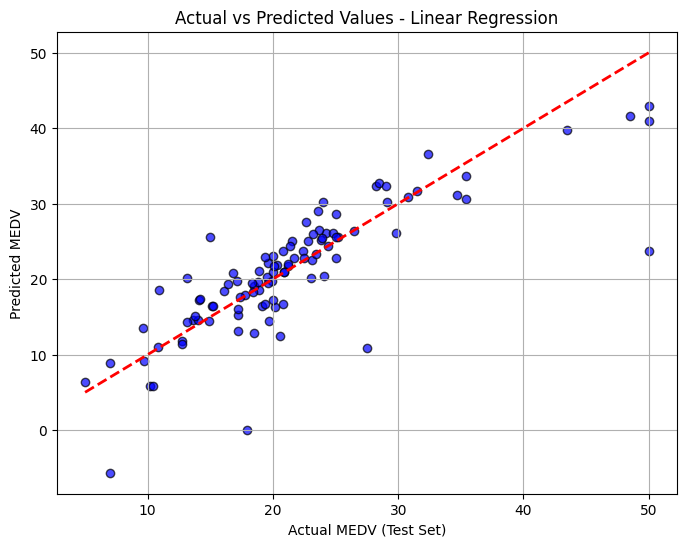

In [ ]:
# STEP 4
# Results Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')

# Plot the y = x line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.xlabel("Actual MEDV (Test Set)")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Values - Linear Regression")
plt.grid(True)
plt.show()
